<a href="https://colab.research.google.com/github/sourovamin/DeepLearningTensorflow/blob/master/findClothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Tensorflow and check the version

In [3]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

1.13.1


Load Fashion MNIST dataset

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see

2
[[  0   0   0   1   0   0   0   0   0  34 148 202 107  84 162 198  90  26
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  21 107 166 168 152 204 238 248 237 190 142 178
  158  98  17   0   0   0   0   0   0   0]
 [  0   0   0   1   0  55 188 140 131 121 119 116 146 157 132 115 136 125
  140 143 181  51   0   0   0   0   0   0]
 [  0   0   0   0   0 167 134 113 130 134 140 132 125 125 131 135 130 133
  131 115 135 163   6   0   0   0   0   0]
 [  0   0   0   0  58 148 133 124 134 128 135 128 133 130 133 137 138 130
  124 130 133 147  82   0   1   0   0   0]
 [  0   0   0   0  86 148 158 139 124 120 131 134 132 134 124 134 132 137
  126 137 136 146 114   0   0   0   0   0]
 [  0   0   0   0 112 141 174 143 117 134 130 128 131 136 134 128 128 131
  106 187 149 147 143   0   0   0   0   0]
 [  0   0   0   0 134 151 167 154 114 134 138 139 135 135 130 130 124 129
  119 229 141 145 164   0   0   0   0   0]
 [  0   0   0   0 136 154 169 157 109 147 140 137 137 136 142 

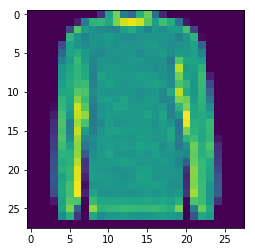

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_images[45])
print(training_labels[45])
print(training_images[45])

Normalizing and converting into binary rather than 0 to 255. Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Let's now design the model.

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels

In [9]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5036 - acc: 0.8221
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3769 - acc: 0.8643
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3406 - acc: 0.8767
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3153 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2961 - acc: 0.8917
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2823 - acc: 0.8955
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2711 - acc: 0.8987
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2595 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2493 - acc: 0.9060
Epoch 10/1

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3290 - acc: 0.8860


[0.3290477181434631, 0.886]

Probability on being in a class

In [14]:
classifications = model.predict(test_images)

print(classifications[1])

[4.2249585e-06 7.2314117e-14 9.9824119e-01 2.1737324e-11 1.3716891e-03
 5.9951686e-13 3.8295277e-04 1.1205214e-16 1.3439092e-10 1.9219681e-14]


Print the class label

In [13]:
print(test_labels[1])

2
